In [1]:
%matplotlib notebook

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file = 'Motor_Vehicle_Crashes_modified.csv'

In [4]:
motor_vehicle_df = pd.read_csv(file, encoding="ISO-8859-1")


In [5]:
motor_vehicle_df.head()
#motorvehicle_df.head()

,Year,Vehicle Body Type,Action Prior to Accident,Type / Axles of Truck or Bus,Vehicle Year,State of Registration,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type,Unnamed: 12
0,2016,SUBURBAN,Changing Lanes,Not Entered,2012.0,NY,MINI,HUMAN,Unsafe Lane Changing,HUMAN,Not Applicable,Not Applicable,NaN
1,2016,PICKUP TRUCK,Going Straight Ahead,Not Entered,2014.0,NY,CHEVR,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable,NaN
2,2016,4 DOOR SEDAN,Going Straight Ahead,Not Entered,2007.0,NY,HONDA,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable,NaN
3,2016,SUBURBAN,Going Straight Ahead,Not Entered,2011.0,NY,CHEVR,ENVMT,Pavement Slippery,ENVMT,Obstruction/ Debris,Unknown,NaN
4,2016,SUBURBAN,Going Straight Ahead,Not Entered,2004.0,NY,BUICK,ENVMT,Pavement Slippery,HUMAN,Not Applicable,"Snow Embankment, Collision With Fixed Object",NaN


In [6]:
del motor_vehicle_df['Unnamed: 12']
motor_vehicle_df.head()

,Year,Vehicle Body Type,Action Prior to Accident,Type / Axles of Truck or Bus,Vehicle Year,State of Registration,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type
0,2016,SUBURBAN,Changing Lanes,Not Entered,2012.0,NY,MINI,HUMAN,Unsafe Lane Changing,HUMAN,Not Applicable,Not Applicable
1,2016,PICKUP TRUCK,Going Straight Ahead,Not Entered,2014.0,NY,CHEVR,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable
2,2016,4 DOOR SEDAN,Going Straight Ahead,Not Entered,2007.0,NY,HONDA,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable
3,2016,SUBURBAN,Going Straight Ahead,Not Entered,2011.0,NY,CHEVR,ENVMT,Pavement Slippery,ENVMT,Obstruction/ Debris,Unknown
4,2016,SUBURBAN,Going Straight Ahead,Not Entered,2004.0,NY,BUICK,ENVMT,Pavement Slippery,HUMAN,Not Applicable,"Snow Embankment, Collision With Fixed Object"


In [7]:
motor_vehicle_df.count()
#motorvehicle_df.count()
#motor_vehicle_df['Vehicle Make'].value_counts()

Year                                 1048575
Vehicle Body Type                    1048575
Action Prior to Accident             1048575
Type / Axles of Truck or Bus         1048575
Vehicle Year                          890678
State of Registration                 965273
Vehicle Make                          891552
Contributing Factor 1                1048552
Contributing Factor 1 Description    1048552
Contributing Factor 2                1048553
Contributing Factor 2 Description    1048553
Event Type                           1028946
dtype: int64

In [8]:
motor_vehicle_df = motor_vehicle_df.dropna(how='any')

In [9]:
motor_vehicle_df.count()

Year                                 870343
Vehicle Body Type                    870343
Action Prior to Accident             870343
Type / Axles of Truck or Bus         870343
Vehicle Year                         870343
State of Registration                870343
Vehicle Make                         870343
Contributing Factor 1                870343
Contributing Factor 1 Description    870343
Contributing Factor 2                870343
Contributing Factor 2 Description    870343
Event Type                           870343
dtype: int64

In [10]:
#motor_vehicle_df['Vehicle Make'].replace('TYOYTA', 'TOYOTA', inplace = True)
motor_vehicle_df['Vehicle Make'] = motor_vehicle_df['Vehicle Make'].replace({'FRD':'FORD','NISSA': 'NISSAN','HYUND' :'HYUNDAI','SUBAR':'SUBARU'})



In [11]:
motor_vehicle_df['Vehicle Make'].value_counts()

TOYOT      101443
FORD        96623
HONDA       89126
CHEVR       86578
NISSAN      65892
DODGE       37912
HYUNDAI     35850
JEEP        34433
SUBARU      21591
CHRYS       17852
VOLKS       16665
KIA         16602
BMW         16503
GMC         16192
ME/BE       14619
LEXUS       12129
ACURA       11831
MAZDA       11322
BUICK       11166
PONTI       10721
LINCO        8541
MITSU        7758
AUDI         7533
INFIN        7510
CADIL        7230
SATUR        7083
MERCU        7044
VOLVO        5608
CHEV         5323
TOYT         5140
            ...  
FRIS            1
YUGO            1
GLOBE           1
TRKIN           1
GVM             1
FL/BO           1
TC/TR           1
WELLS           1
ELEME           1
PALAZ           1
LAFRA           1
EALO            1
WMFS            1
CABCH           1
RO/EN           1
ZONG            1
NORTO           1
TRUC            1
SIAT            1
MACKC           1
BUBAR           1
CMSU            1
IS              1
CFBT            1
RL/RO     

In [12]:
factor_year1_df = motor_vehicle_df.loc[:,["Year","Contributing Factor 1 Description"]]
factor_year_df = factor_year1_df.rename(columns={"Contributing Factor 1 Description":"Factors"})
factor_year_df.head()

,Year,Factors
0,2016,Unsafe Lane Changing
1,2016,Pavement Slippery
2,2016,Pavement Slippery
3,2016,Pavement Slippery
4,2016,Pavement Slippery


In [13]:
grouped_factor_df = factor_year_df.groupby(["Factors","Year"])
factors_count = grouped_factor_df["Year"].count()

factors_df = pd.DataFrame({"Count of Crashes" : factors_count})
factors_df


Count of Crashes
Factors                                     Year                  
Accelerator Defective                       2014               173
                                            2015                33
Aggressive Driving/Road Rage                2014               547
                                            2015                31
Alcohol Involvement                         2014              5251
                                            2015              4892
Animal's Action                             2014             20676
                                            2015               324
Backing Unsafely                            2014              8456
                                            2015              2833
                                            2016                 1
Brakes Defective                            2014               963
                                            2015               111
Cell Phone (hand held)                      2014               280
                                            2015                26
Cell Phone (hands-free)                     2014                26
                                            2015                 5
Driver Inattention/Distraction*             2014             28849
                                            2015             21451
                                            2016                 2
Driver Inexperience*                        2014              2191
                                            2015              2477
Driverless/Runaway Vehicle                  2014               146
                                            2015                20
Drugs (Illegal)                             2014               415
                                            2015               495
Eating or Drinking                          2014                54
                                            2015                 4
Failure to Keep Right                       2014              2121
                                            2015               551
...                                                            ...
Shoulders Defective/Improper                2014                39
                                            2015                 3
Steering Failure                            2014               422
                                            2015                76
Texting                                     2014                24
Tinted Windows                              2014                10
Tire Failure/Inadequate                     2014               846
                                            2015               204
Tow Hitch Defective                         2014                48
                                            2015                 4
Traffic Control Device Disregarded          2014              5843
                                            2015              1428
Traffic Control Device Improper/Non-Working 2014               160
                                            2015                 9
Turning Improperly                          2014              5383
                                            2015              1100
Unknown                                     2014             14477
                                            2015              5881
Unsafe Lane Changing                        2014              6378
                                            2015              1140
                                            2016                 1
Unsafe Speed                                2014             17213
                                            2015             11725
                                            2016                 3
Using On Board Navigation Device            2014                35
                                            2015                 2
View Obstructed/Limited                     2014              2486
                              

In [14]:
factors_df_pivot = factors_df.pivot_table(index = "Factors",columns = "Year")["Count of Crashes"]
factors_df_pivot = factors_df_pivot.reset_index()
factors_df_pivot = factors_df_pivot.set_index("Factors")
factors_df_pivot = factors_df_pivot.drop("Not Applicable", axis=0)
factors_df_pivot = factors_df_pivot.drop("Not Entered", axis=0)

factors_df_pivot = factors_df_pivot.reset_index()
factors_df_pivot=factors_df_pivot.fillna(0)

factors_df_pivot

Year,Factors,2014,2015,2016
0,Accelerator Defective,173.0,33.0,0.0
1,Aggressive Driving/Road Rage,547.0,31.0,0.0
2,Alcohol Involvement,5251.0,4892.0,0.0
3,Animal's Action,20676.0,324.0,0.0
4,Backing Unsafely,8456.0,2833.0,1.0
5,Brakes Defective,963.0,111.0,0.0
6,Cell Phone (hand held),280.0,26.0,0.0
7,Cell Phone (hands-free),26.0,5.0,0.0
8,Driver Inattention/Distraction*,28849.0,21451.0,2.0
9,Driver Inexperience*,2191.0,2477.0,0.0


In [15]:
factors_df_pivot[2014].max()

32183.0

In [16]:
#Percentage
year1 = factors_df_pivot[2014]/factors_df_pivot[2014].max()*100
year2 = factors_df_pivot[2015]/factors_df_pivot[2014].max()*100
year3 = factors_df_pivot[2016]/factors_df_pivot[2014].max()*100


<IPython.core.display.Javascript object>


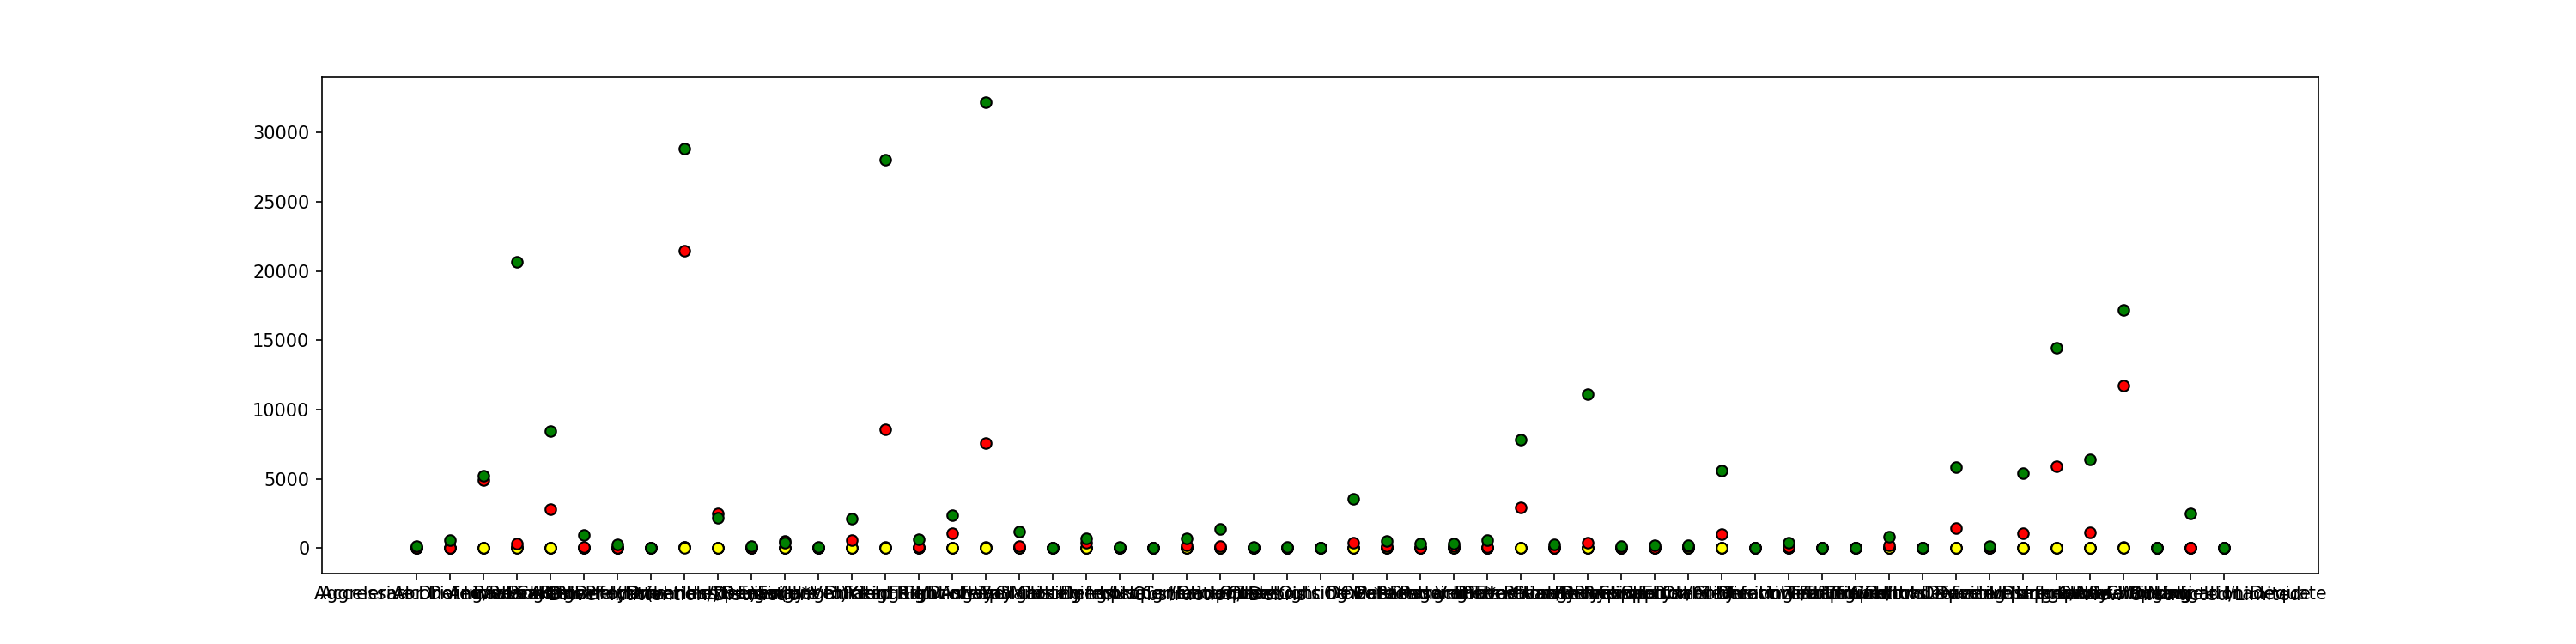

In [17]:
#Scatter Plot
plt.figure(figsize=(20,5))
plt.scatter(factors_df_pivot["Factors"], year1, marker="o", facecolors="red", edgecolors="black")
plt.scatter(factors_df_pivot["Factors"], year2, marker="o", facecolors="green", edgecolors="black")
plt.scatter(factors_df_pivot["Factors"], year3, marker="o", facecolors="yellow", edgecolors="black")
plt.show()
    

In [18]:
#plt.figure(figsize=(20,5))
plt.scatter(factors_df_pivot["Factors"], factors_df_pivot[2015], marker="o", facecolors="red", edgecolors="black")
plt.scatter(factors_df_pivot["Factors"], factors_df_pivot[2014], marker="o", facecolors="green", edgecolors="black")
#plt.ylim(0,500)
#plt.xlim(4,60)
plt.show() 

In [19]:
#Analyze Accidental Factors vs Years
xaxis = np.arange(len(factors_df_pivot))
tick_locations = [value+0.4 for value in xaxis]
xaxis

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54])

In [20]:
print(year1)

0       0.537551
1       1.699655
2      16.316067
3      64.245098
4      26.274741
5       2.992263
6       0.870025
7       0.080788
8      89.640493
9       6.807942
10      0.453656
11      1.289501
12      0.167790
13      6.590436
14     87.067707
15      1.926483
16      7.342386
17    100.000000
18      3.756642
19      0.090110
20      2.224777
21      0.273436
22      0.006214
23      2.199919
24      4.337694
25      0.233042
26      0.245471
27      0.142933
28     10.974738
29      1.693441
30      0.941491
31      1.078209
32      1.764907
33     24.388652
34      0.798558
35     34.462294
36      0.512693
37      0.605910
38      0.559301
39     17.372526
40      0.121182
41      1.311251
42      0.074574
43      0.031072
44      2.628717
45      0.149147
46     18.155548
47      0.497157
48     16.726222
49     44.983376
50     19.817916
51     53.484759
52      0.108753
53      7.724575
54      0.049716
Name: 2014, dtype: float64


In [21]:
print(year2)

0      0.102539
1      0.096324
2     15.200572
3      1.006743
4      8.802784
5      0.344903
6      0.080788
7      0.015536
8     66.653202
9      7.696610
10     0.062145
11     1.538079
12     0.012429
13     1.712084
14    26.613429
15     0.285865
16     3.393096
17    23.577665
18     0.407047
19     0.027965
20     1.152783
21     0.062145
22     0.003107
23     0.655626
24     0.425691
25     0.021751
26     0.021751
27     0.021751
28     1.252214
29     0.462977
30     0.152254
31     0.375975
32     0.158469
33     9.141472
34     0.108753
35     1.174533
36     0.136718
37     0.155362
38     0.363546
39     3.175590
40     0.009322
41     0.236150
42     0.000000
43     0.000000
44     0.633875
45     0.012429
46     4.437125
47     0.027965
48     3.417954
49    18.273623
50     3.542243
51    36.432278
52     0.006214
53     0.080788
54     0.012429
Name: 2015, dtype: float64


<IPython.core.display.Javascript object>


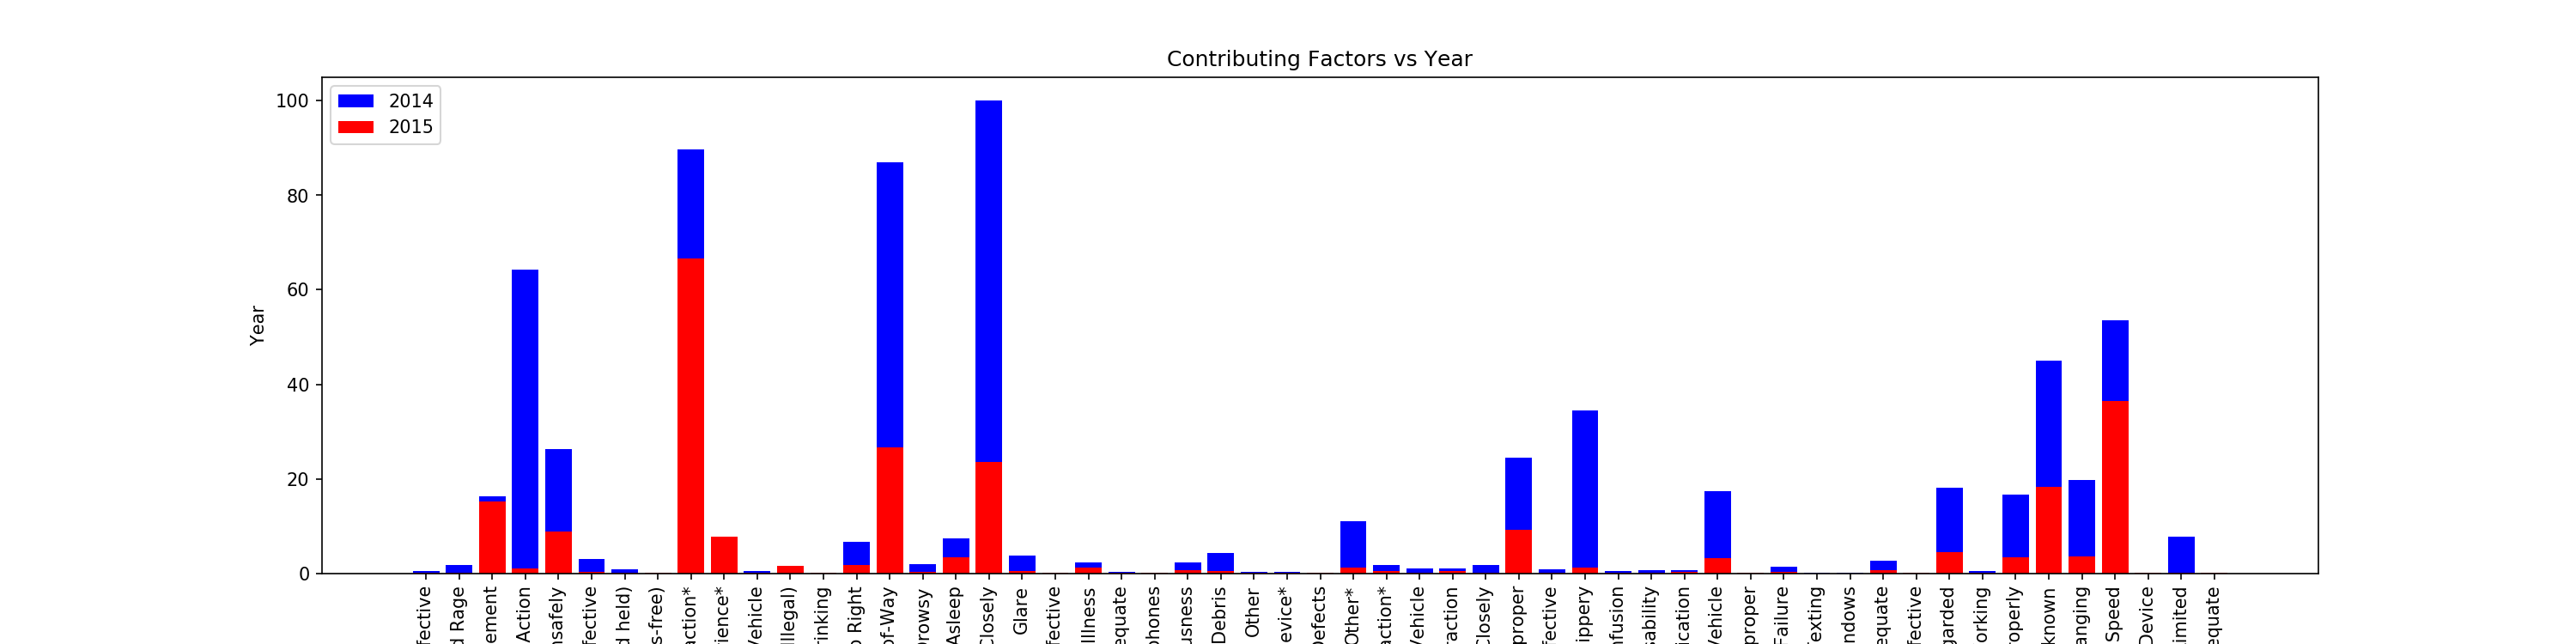

In [22]:
plt.figure(figsize=(20,5))
plt.bar(xaxis,year1, color="b", align="edge", label = '2014')
plt.bar(xaxis,year2, color="r", align="edge", label = '2015')
plt.xticks(tick_locations, factors_df_pivot["Factors"], rotation="vertical")
plt.legend(loc='upper left')
plt.title("Contributing Factors vs Year")
plt.xlabel("Factors")
plt.ylabel("Year")
plt.show()

In [23]:
plt.savefig("C:/Users/hello/OneDrive/Desktop/Rutgers-project1/Images/Factor.png")
plt.show()

In [24]:
new_df = pd.DataFrame({"Factors": factors_df_pivot["Factors"],
                       "2014":year1,
                             "2015":year2})

In [25]:
new_df = new_df.sort_values(['2015'], ascending=False)
# new1_df = sort_values.head()
new_df

,Factors,2014,2015
8,Driver Inattention/Distraction*,89.640493,66.653202
51,Unsafe Speed,53.484759,36.432278
14,Failure to Yield Right-of-Way,87.067707,26.613429
17,Following Too Closely,100.000000,23.577665
49,Unknown,44.983376,18.273623
2,Alcohol Involvement,16.316067,15.200572
33,Passing or Lane Usage Improper,24.388652,9.141472
4,Backing Unsafely,26.274741,8.802784
9,Driver Inexperience*,6.807942,7.696610
46,Traffic Control Device Disregarded,18.155548,4.437125


In [26]:
new1_df = new_df[new_df['Factors'].str.contains("Driver ") |
                 new_df['Factors'].str.contains("Unsafe Speed") |
                 new_df['Factors'].str.contains("Alcohol")]
new1_df       

,Factors,2014,2015
8,Driver Inattention/Distraction*,89.640493,66.653202
51,Unsafe Speed,53.484759,36.432278
2,Alcohol Involvement,16.316067,15.200572
9,Driver Inexperience*,6.807942,7.696610


<IPython.core.display.Javascript object>


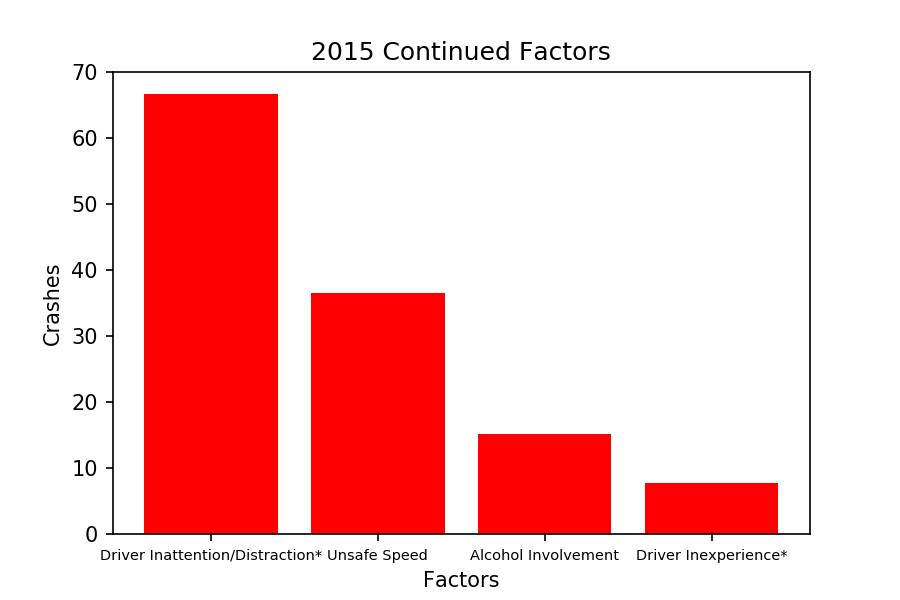

In [38]:
plt.figure(figsize=(6,4))
xaxis = np.arange(len(new1_df))
tick_locations = [value for value in xaxis]


yaxis = new1_df["2015"]
plt.bar(xaxis,yaxis, color="red", align="center")

plt.xticks(tick_locations, new1_df["Factors"],rotation=0, fontsize=7)
plt.title("2015 Continued Factors")
plt.xlabel("Factors")
plt.ylabel("Crashes")
plt.show()

In [39]:
plt.savefig("C:/Users/hello/OneDrive/Desktop/Rutgers-project1/Images/2015Factor.png")
plt.show()